# NFL Fantasy Football 

# 0. Import libraries

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import requests
from bs4 import BeautifulSoup

# Own libraries
from library_nfl import *

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show all columns in pandas
pd.set_option('display.max_columns', 500) 

# Graphing style
plt.style.use('seaborn-colorblind')

%matplotlib inline

# 1. Scrape data

## 1.1 Player stats

In [2]:
# Links for data in each position
urls_22 = ['https://www.fantasypros.com/nfl/stats/qb.php?year=2022&scoring=PPR',
           'https://www.fantasypros.com/nfl/stats/rb.php?year=2022&scoring=PPR',
           'https://www.fantasypros.com/nfl/stats/wr.php?year=2022&scoring=PPR',
           'https://www.fantasypros.com/nfl/stats/te.php?year=2022&scoring=PPR',
           'https://www.fantasypros.com/nfl/stats/k.php?year=2022&scoring=PPR',
           'https://www.fantasypros.com/nfl/stats/dst.php?year=2022&scoring=PPR',
           'https://www.fantasypros.com/nfl/stats/db.php?year=2022&scoring=PPR']

urls_21 = ['https://www.fantasypros.com/nfl/stats/qb.php?year=2021&scoring=PPR',
           'https://www.fantasypros.com/nfl/stats/rb.php?year=2021&scoring=PPR',
           'https://www.fantasypros.com/nfl/stats/wr.php?year=2021&scoring=PPR',
           'https://www.fantasypros.com/nfl/stats/te.php?year=2021&scoring=PPR',
           'https://www.fantasypros.com/nfl/stats/k.php?year=2021&scoring=PPR',
           'https://www.fantasypros.com/nfl/stats/dst.php?year=2021&scoring=PPR',
           'https://www.fantasypros.com/nfl/stats/db.php?year=2021&scoring=PPR']

urls_20 = ['https://www.fantasypros.com/nfl/stats/qb.php?year=2020&scoring=PPR',
           'https://www.fantasypros.com/nfl/stats/rb.php?year=2020&scoring=PPR',
           'https://www.fantasypros.com/nfl/stats/wr.php?year=2020&scoring=PPR',
           'https://www.fantasypros.com/nfl/stats/te.php?year=2020&scoring=PPR',
           'https://www.fantasypros.com/nfl/stats/k.php?year=2020&scoring=PPR',
           'https://www.fantasypros.com/nfl/stats/dst.php?year=2020&scoring=PPR',
           'https://www.fantasypros.com/nfl/stats/db.php?year=2020&scoring=PPR']

urls_19 = ['https://www.fantasypros.com/nfl/stats/qb.php?year=2019&scoring=PPR',
           'https://www.fantasypros.com/nfl/stats/rb.php?year=2019&scoring=PPR',
           'https://www.fantasypros.com/nfl/stats/wr.php?year=2019&scoring=PPR',
           'https://www.fantasypros.com/nfl/stats/te.php?year=2019&scoring=PPR',
           'https://www.fantasypros.com/nfl/stats/k.php?year=2019&scoring=PPR',
           'https://www.fantasypros.com/nfl/stats/dst.php?year=2019&scoring=PPR',
           'https://www.fantasypros.com/nfl/stats/db.php?year=2019&scoring=PPR']

urls_18 = ['https://www.fantasypros.com/nfl/stats/qb.php?year=2018&scoring=PPR',
           'https://www.fantasypros.com/nfl/stats/rb.php?year=2018&scoring=PPR',
           'https://www.fantasypros.com/nfl/stats/wr.php?year=2018&scoring=PPR',
           'https://www.fantasypros.com/nfl/stats/te.php?year=2018&scoring=PPR',
           'https://www.fantasypros.com/nfl/stats/k.php?year=2018&scoring=PPR',
           'https://www.fantasypros.com/nfl/stats/dst.php?year=2018&scoring=PPR',
           'https://www.fantasypros.com/nfl/stats/db.php?year=2018&scoring=PPR']

# Import 2022 data
data_stats_22 = pull_data_stats(urls_22)

# Import 2021 data
data_stats_21 = pull_data_stats(urls_21)

# Import 2020 data
data_stats_20 = pull_data_stats(urls_20)

# Import 2019 data
data_stats_19 = pull_data_stats(urls_19)

# Import 2018 data
data_stats_18 = pull_data_stats(urls_19)


In [3]:
data_stats_22['RB'].head(4)

,rank,player,att,yds,y/a,lg,20+,td,rec,tgt,yds,y/r,td,fl,g,fpts,fpts/g,pos,team
0,1,Austin Ekeler,204,915,4.5,72,10,13,107,127,722,6.7,5,3,17,372.7,21.9,RB,LAC
1,2,Christian McCaffrey,244,1139,4.7,49,14,8,85,108,741,8.7,5,0,17,356.4,21.0,RB,SF
2,3,Josh Jacobs,340,1653,4.9,86,14,12,53,64,400,7.5,0,1,17,328.3,19.3,RB,LV
3,4,Derrick Henry,349,1538,4.4,56,20,13,33,41,398,12.1,0,3,16,302.8,18.9,RB,TEN


## 1.2 Snap count

In [4]:
# URLS for last 3 years

urls_22 = ['https://www.fantasypros.com/nfl/reports/snap-counts/qb.php?year=2022&show=perc',
           'https://www.fantasypros.com/nfl/reports/snap-counts/rb.php?year=2022&show=perc',
           'https://www.fantasypros.com/nfl/reports/snap-counts/wr.php?year=2022&show=perc',
           'https://www.fantasypros.com/nfl/reports/snap-counts/te.php?year=2022&show=perc']

urls_21 = ['https://www.fantasypros.com/nfl/reports/snap-counts/qb.php?year=2021&show=perc',
           'https://www.fantasypros.com/nfl/reports/snap-counts/rb.php?year=2021&show=perc',
           'https://www.fantasypros.com/nfl/reports/snap-counts/wr.php?year=2021&show=perc',
           'https://www.fantasypros.com/nfl/reports/snap-counts/te.php?year=2021&show=perc']

urls_20 = ['https://www.fantasypros.com/nfl/reports/snap-counts/qb.php?year=2020&show=perc',
           'https://www.fantasypros.com/nfl/reports/snap-counts/rb.php?year=2020&show=perc',
           'https://www.fantasypros.com/nfl/reports/snap-counts/wr.php?year=2020&show=perc',
           'https://www.fantasypros.com/nfl/reports/snap-counts/te.php?year=2020&show=perc']

urls_19 = ['https://www.fantasypros.com/nfl/reports/snap-counts/qb.php?year=2019&show=perc',
           'https://www.fantasypros.com/nfl/reports/snap-counts/rb.php?year=2019&show=perc',
           'https://www.fantasypros.com/nfl/reports/snap-counts/wr.php?year=2019&show=perc',
           'https://www.fantasypros.com/nfl/reports/snap-counts/te.php?year=2019&show=perc']

urls_18 = ['https://www.fantasypros.com/nfl/reports/snap-counts/qb.php?year=2018&show=perc',
           'https://www.fantasypros.com/nfl/reports/snap-counts/rb.php?year=2018&show=perc',
           'https://www.fantasypros.com/nfl/reports/snap-counts/wr.php?year=2018&show=perc',
           'https://www.fantasypros.com/nfl/reports/snap-counts/te.php?year=2018&show=perc']


data_snapcount_22 = pull_data_snapcount(urls_22)
data_snapcount_21 = pull_data_snapcount(urls_21)
data_snapcount_20 = pull_data_snapcount(urls_20)
data_snapcount_19 = pull_data_snapcount(urls_19)
data_snapcount_18 = pull_data_snapcount(urls_18)

## Snapcount clean

In [5]:
data_snapcount_22['RB']

,player,team,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,ttl,avg_snap_pct_played,avg_snap_pct_global,pos
0,Mark Ingram II,NO,33.0,37.0,33.0,48.0,22.0,33.0,28.0,8.0,0.0,0.0,0.0,30.0,42.0,NaN,0.0,0.0,0.0,0.0,205.0,31.400000,18.470588,RB
1,Brandon Bolden,LV,28.0,0.0,36.0,7.0,16.0,NaN,0.0,0.0,7.0,0.0,5.0,0.0,0.0,2.0,0.0,4.0,21.0,0.0,81.0,14.000000,7.411765,RB
2,Cordarrelle Patterson,ATL,65.0,59.0,61.0,29.0,0.0,0.0,0.0,0.0,39.0,38.0,49.0,58.0,46.0,NaN,50.0,37.0,50.0,28.0,382.0,46.846154,35.823529,RB
3,Giovani Bernard,TB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,45.0,25.0,45.000000,2.647059,RB
4,Rex Burkhead,HOU,71.0,37.0,41.0,32.0,21.0,NaN,35.0,19.0,22.0,25.0,0.0,18.0,0.0,8.0,19.0,16.0,19.0,15.0,251.0,26.533333,23.411765,RB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,Malik Davis,DAL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,NaN,13.0,18.0,0.0,4.0,0.0,0.0,0.0,32.0,9.0,78.0,18.166667,6.411765,RB
156,Jaylen Warren,PIT,37.0,29.0,20.0,25.0,51.0,31.0,23.0,29.0,NaN,43.0,4.0,0.0,20.0,40.0,34.0,31.0,40.0,42.0,342.0,31.187500,29.352941,RB
157,Isiah Pacheco,KC,23.0,9.0,8.0,21.0,3.0,15.0,30.0,NaN,22.0,56.0,40.0,51.0,45.0,43.0,35.0,49.0,45.0,36.0,351.0,31.235294,31.235294,RB
158,Julius Chestnut,TEN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,13.0,10.0,2.0,0.0,22.0,0.0,29.0,11.750000,2.764706,RB


## 1.3 Team's target distribution by position

In [6]:
# List of abbreviations
team_abbreviations = ['KC', 'BUF', 'PHI', 'CIN', 'SEA', 'CHI', 'MIN', 'JAC', 'NYG',
                    'DET', 'LAC', 'FA', 'NYJ', 'BAL', 'MIA', 'DEN', 'NO', 'DAL', 'ARI',
                    'HOU', 'CAR', 'NE', 'WAS', 'LV', 'TEN', 'PIT', 'TB', 'ATL', 'LAR',
                    'SF', 'CLE', 'IND', 'GB']
# List of full names 
team_names = ['Kansas City Chiefs', 'Buffalo Bills', 'Philadelphia Eagles',
            'Cincinnati Bengals', 'Seattle Seahawks', 'Chicago Bears',
            'Minnesota Vikings', 'Jacksonville Jaguars', 'New York Giants',
            'Detroit Lions', 'Los Angeles Chargers', 'Free Agent', 'New York Jets',
            'Baltimore Ravens', 'Miami Dolphins', 'Denver Broncos', 'New Orleans Saints',
            'Dallas Cowboys', 'Arizona Cardinals', 'Houston Texans',
            'Carolina Panthers', 'New England Patriots', 'Washington Commanders',
            'Las Vegas Raiders', 'Tennessee Titans', 'Pittsburgh Steelers',
            'Tampa Bay Buccaneers', 'Atlanta Falcons', 'Los Angeles Rams',
            'San Francisco 49ers', 'Cleveland Browns', 'Indianapolis Colts',
            'Green Bay Packers']

# Create the corrected dictionary
nfl_teams_dict = dict(zip(team_names, team_abbreviations))

In [7]:
urls_22 = ['https://www.fantasypros.com/nfl/reports/targets-distribution/?year=2022&start=1&end=18']

urls_21 = ['https://www.fantasypros.com/nfl/reports/targets-distribution/?year=2021&start=1&end=18']

urls_20 = ['https://www.fantasypros.com/nfl/reports/targets-distribution/?year=2020&start=1&end=18']

urls_19 = ['https://www.fantasypros.com/nfl/reports/targets-distribution/?year=2019&start=1&end=18']

urls_18 = ['https://www.fantasypros.com/nfl/reports/targets-distribution/?year=2018&start=1&end=18']

df_target_dist_22 = pull_data_target_distribution(urls_22, nfl_teams_dict)
df_target_dist_21 = pull_data_target_distribution(urls_21, nfl_teams_dict)
df_target_dist_20 = pull_data_target_distribution(urls_20, nfl_teams_dict)
df_target_dist_19 = pull_data_target_distribution(urls_19, nfl_teams_dict)
df_target_dist_18 = pull_data_target_distribution(urls_18, nfl_teams_dict)

In [8]:
df_target_dist_19.head(4)

,team_name,wr_targets,wr_pct,rb_targets,rb_pct,te_targets,te_pct,total_targets,team
0,Arizona Cardinals,369,69.8,104,19.7,56,10.6,529,ARI
1,Atlanta Falcons,421,64.4,112,17.1,121,18.5,654,ATL
2,Baltimore Ravens,182,42.9,62,14.6,180,42.5,424,BAL
3,Buffalo Bills,322,66.5,80,16.5,82,16.9,484,BUF


# 2. Data cleaning and merging

## 2.1 RB Data cleaning

In [9]:
def teammates_att_tgt(x, df, team_x, team, att_tgt):
    # Calculate attemts of teammates
    df_teammates = df[df['player'] != x['player']]
    df_teammates = df_teammates[df_teammates[team_x] == team]

    att_teammates = df_teammates[att_tgt].sum()

    return att_teammates

In [10]:
def create_data_rb(stats_data, stats_data_1, stats_data_2, snap_data, snap_data_1, snap_data_2, targets_data, targets_data_1, targets_data_2):
    # Get initial stats dataframe and merge team 
    df_rb = stats_data['RB'].drop(columns=['pos', 'lg', 'fpts/g', 'y/a', 'y/r'])
     # Get initial stats dataframe
    df_rb_1 = stats_data_1['RB'].drop(columns=['pos', 'lg', 'fpts/g', 'team', 'y/a', 'y/r'])
     # Get initial stats dataframe
    df_rb_2 = stats_data_2['RB'].drop(columns=['pos', 'lg', 'fpts/g', 'team', 'y/a', 'y/r'])

    #///////////////////////////////////////////////////////////////////////////////////////////////////////////////////

    # Get snapcount data
    df_snaps = snap_data['RB'][['player', 'team', 'avg_snap_pct_played', 'avg_snap_pct_global']]
    # Get snapcount data previous year
    df_snaps_1 = snap_data_1['RB'][['player', 'team', 'avg_snap_pct_played', 'avg_snap_pct_global']]
    # Get snapcount t-2 years
    df_snaps_2 = snap_data_2['RB'][['player', 'team', 'avg_snap_pct_played', 'avg_snap_pct_global']]

    #///////////////////////////////////////////////////////////////////////////////////////////////////////////////////

    # Get targets dataframe by team
    df_targets = targets_data[['team', 'rb_targets', 'rb_pct', 'total_targets']]
     # Get targets dataframe by team
    df_targets_1 = targets_data_1[['team', 'rb_targets', 'rb_pct', 'total_targets']]
     # Get targets dataframe by team
    df_targets_2 = targets_data_2[['team', 'rb_targets', 'rb_pct', 'total_targets']]

    #///////////////////////////////////////////////////////////////////////////////////////////////////////////////////

    # Merge previous years stats
    df_rb_past = df_rb_1.merge(df_rb_2, how='outer', on='player', suffixes=('_1', '_2'))
    # Merge previous years with current
    df_rb = df_rb.merge(df_rb_past, how='left', on='player')

    #///////////////////////////////////////////////////////////////////////////////////////////////////////////////////

    # Merge previous snap data
    df_snaps_past = df_snaps_1.merge(df_snaps_2, how='outer', on='player', suffixes=('_1', '_2'))
    df_snaps_past = df_snaps.merge(df_snaps_past, how='outer', on='player')
    # Merge previous years with current year
    df_rb = df_rb.merge(df_snaps_past, how='left', on='player', suffixes=('', '_0'))
    
    # Clean team with multiple teams
    df_rb['team_0'] = df_rb.apply(lambda x: x['team_0'] if x['team_0'] != 'Multi' else x['team'], axis=1)
    df_rb['team_1'] = df_rb.apply(lambda x: x['team_1'] if x['team_1'] != 'Multi' else x['team_0'], axis=1)
    df_rb['team_2'] = df_rb.apply(lambda x: x['team_2'] if x['team_2'] != 'Multi' else x['team_1'], axis=1)

    # ///////////////////////////////////////////////////////////////////////////////////////////////////////////////////

    # Merge team's traget distr data
    df_rb = df_rb.merge(df_targets, how='left', on='team')
    df_rb = df_rb.merge(df_targets_1, how='left', left_on='team_1', right_on='team', suffixes=('', '_1'))
    df_rb = df_rb.merge(df_targets_2, how='left', left_on='team_2', right_on='team', suffixes=('', '_2'))

    # Remove duplicated columns
    df_rb = df_rb.loc[:, ~df_rb.columns.duplicated()]

    # Compute attempts of teammates
    df_rb['att_teammates'] = df_rb.apply(lambda x: teammates_att_tgt(x, df_rb, 'team_0', x['team'], 'att'), axis=1)
    df_rb['att_teammates_1'] = df_rb.apply(lambda x: teammates_att_tgt(x, df_rb, 'team_1', x['team_1'], 'att_1'), axis=1)
    df_rb['att_teammates_2'] = df_rb.apply(lambda x: teammates_att_tgt(x, df_rb, 'team_2', x['team_2'], 'att_2'), axis=1)

    # Return data
    return df_rb

**Create data for RB**

In [11]:
# Create 2022 data
df_rb_22 = create_data_rb(data_stats_22, data_stats_21, data_stats_20, data_snapcount_22, data_snapcount_21, data_snapcount_20, 
                          df_target_dist_22, df_target_dist_21, df_target_dist_20)

# Create 2021 data
df_rb_21 = create_data_rb(data_stats_21, data_stats_20, data_stats_19, data_snapcount_21, data_snapcount_20, data_snapcount_19, 
                          df_target_dist_21, df_target_dist_20, df_target_dist_19)

# Create 2020 data
df_rb_20 = create_data_rb(data_stats_20, data_stats_19, data_stats_18, data_snapcount_20, data_snapcount_19, data_snapcount_18, 
                          df_target_dist_20, df_target_dist_19, df_target_dist_18)

df_rb_22.head()

,rank,player,att,yds,20+,td,rec,tgt,fl,g,fpts,team,rank_1,att_1,yds_1,20+_1,td_1,rec_1,tgt_1,fl_1,g_1,fpts_1,rank_2,att_2,yds_2,20+_2,td_2,rec_2,tgt_2,fl_2,g_2,fpts_2,team_0,avg_snap_pct_played,avg_snap_pct_global,team_1,avg_snap_pct_played_1,avg_snap_pct_global_1,team_2,avg_snap_pct_played_2,avg_snap_pct_global_2,rb_targets,rb_pct,total_targets,rb_targets_1,rb_pct_1,total_targets_1,rb_targets_2,rb_pct_2,total_targets_2,att_teammates,att_teammates_1,att_teammates_2
0,1,Austin Ekeler,204,915,10,13,107,127,3,17,372.7,LAC,2.0,206.0,911.0,3.0,12.0,70.0,94.0,3.0,16.0,343.8,26.0,116.0,530.0,2.0,1.0,54.0,65.0,0.0,10.0,165.3,LAC,61.529412,61.529412,LAC,64.562500,60.764706,LAC,56.400000,35.2500,178.0,26.0,685.0,131.0,19.9,658.0,156.0,25.5,611.0,140,137.0,170.0
1,2,Christian McCaffrey,244,1139,14,8,85,108,0,17,356.4,SF,38.0,99.0,442.0,0.0,1.0,37.0,41.0,0.0,7.0,127.5,54.0,59.0,225.0,0.0,5.0,17.0,19.0,0.0,3.0,90.4,SF,74.352941,70.222222,CAR,60.571429,24.941176,CAR,77.333333,14.5000,110.0,21.8,504.0,140.0,24.3,575.0,114.0,21.7,526.0,141,173.0,193.0
2,3,Josh Jacobs,340,1653,14,12,53,64,1,17,328.3,LV,12.0,217.0,872.0,2.0,9.0,54.0,64.0,2.0,15.0,226.0,8.0,273.0,1065.0,3.0,12.0,33.0,45.0,2.0,15.0,231.3,LV,74.117647,74.117647,LV,63.266667,55.823529,LV,61.133333,57.3125,112.0,20.0,559.0,145.0,24.0,603.0,112.0,21.5,521.0,38,116.0,3.0
3,4,Derrick Henry,349,1538,20,13,33,41,3,16,302.8,TEN,22.0,219.0,937.0,9.0,10.0,18.0,20.0,0.0,8.0,193.3,3.0,378.0,2027.0,30.0,17.0,19.0,31.0,2.0,16.0,333.1,TEN,66.500000,62.588235,TEN,72.000000,33.882353,TEN,65.312500,65.3125,85.0,19.5,436.0,104.0,19.9,523.0,58.0,12.4,466.0,61,194.0,45.0
4,5,Saquon Barkley,295,1312,16,10,57,76,0,16,284.0,NYG,30.0,162.0,593.0,6.0,2.0,41.0,57.0,1.0,14.0,148.6,120.0,19.0,34.0,0.0,0.0,6.0,9.0,0.0,2.0,15.4,NYG,79.687500,75.000000,NYG,61.692308,47.176471,NYG,49.500000,6.1875,109.0,22.3,489.0,116.0,20.7,561.0,83.0,16.6,499.0,195,1.0,0.0


## 2.2. WR Data cleaning

In [12]:
def create_data_wr(stats_data, stats_data_1, stats_data_2, snap_data, snap_data_1, snap_data_2, targets_data, targets_data_1, targets_data_2):
    # Get initial stats dataframe and merge team 
    df_wr = stats_data['WR'].drop(columns=['pos', 'lg', 'fpts/g', 'y/r'])
     # Get initial stats dataframe
    df_wr_1 = stats_data_1['WR'].drop(columns=['pos', 'lg', 'fpts/g', 'team', 'y/r'])
     # Get initial stats dataframe
    df_wr_2 = stats_data_2['WR'].drop(columns=['pos', 'lg', 'fpts/g', 'team', 'y/r'])

    #///////////////////////////////////////////////////////////////////////////////////////////////////////////////////

    # Get snapcount data
    df_snaps = snap_data['WR'][['player', 'team', 'avg_snap_pct_played', 'avg_snap_pct_global']]
    # Get snapcount data previous year
    df_snaps_1 = snap_data_1['WR'][['player', 'team', 'avg_snap_pct_played', 'avg_snap_pct_global']]
    # Get snapcount t-2 years
    df_snaps_2 = snap_data_2['WR'][['player', 'team', 'avg_snap_pct_played', 'avg_snap_pct_global']]

    #///////////////////////////////////////////////////////////////////////////////////////////////////////////////////

    # Get targets dataframe by team
    df_targets = targets_data[['team', 'wr_targets', 'wr_pct', 'total_targets']]
     # Get targets dataframe by team
    df_targets_1 = targets_data_1[['team', 'wr_targets', 'wr_pct', 'total_targets']]
     # Get targets dataframe by team
    df_targets_2 = targets_data_2[['team', 'wr_targets', 'wr_pct', 'total_targets']]

    #///////////////////////////////////////////////////////////////////////////////////////////////////////////////////

    # Merge previous years stats
    df_wr_past = df_wr_1.merge(df_wr_2, how='outer', on='player', suffixes=('_1', '_2'))
    # Merge previous years with current
    df_wr = df_wr.merge(df_wr_past, how='left', on='player')

    #///////////////////////////////////////////////////////////////////////////////////////////////////////////////////

    # Merge previous snap data
    df_snaps_past = df_snaps_1.merge(df_snaps_2, how='outer', on='player', suffixes=('_1', '_2'))
    df_snaps_past = df_snaps.merge(df_snaps_past, how='outer', on='player')
    # Merge previous years with current year
    df_wr = df_wr.merge(df_snaps_past, how='left', on='player', suffixes=('', '_0'))
    
    # Clean team with multiple teams
    df_wr['team_0'] = df_wr.apply(lambda x: x['team_0'] if x['team_0'] != 'Multi' else x['team'], axis=1)
    df_wr['team_1'] = df_wr.apply(lambda x: x['team_1'] if x['team_1'] != 'Multi' else x['team_0'], axis=1)
    df_wr['team_2'] = df_wr.apply(lambda x: x['team_2'] if x['team_2'] != 'Multi' else x['team_1'], axis=1)

    # ///////////////////////////////////////////////////////////////////////////////////////////////////////////////////

    # Merge team's traget distr data
    df_wr = df_wr.merge(df_targets, how='left', on='team')
    df_wr = df_wr.merge(df_targets_1, how='left', left_on='team_1', right_on='team', suffixes=('', '_1'))
    df_wr = df_wr.merge(df_targets_2, how='left', left_on='team_2', right_on='team', suffixes=('', '_2'))

    # Remove duplicated columns
    df_wr = df_wr.loc[:, ~df_wr.columns.duplicated()]

    # Compute tgts of teammates
    df_wr['tgt_teammates'] = df_wr.apply(lambda x: teammates_att_tgt(x, df_wr, 'team_0', x['team'], 'tgt'), axis=1)
    df_wr['tgt_teammates_1'] = df_wr.apply(lambda x: teammates_att_tgt(x, df_wr, 'team_1', x['team_1'], 'tgt_1'), axis=1)
    df_wr['tgt_teammates_2'] = df_wr.apply(lambda x: teammates_att_tgt(x, df_wr, 'team_2', x['team_2'], 'tgt_2'), axis=1)

    # Return data
    return df_wr

**Create data for WR**

In [13]:
# Create 2022 data
df_wr_22 = create_data_wr(data_stats_22, data_stats_21, data_stats_20, data_snapcount_22, data_snapcount_21, data_snapcount_20, 
                          df_target_dist_22, df_target_dist_21, df_target_dist_20)

# Create 2021 data
df_wr_21 = create_data_wr(data_stats_21, data_stats_20, data_stats_19, data_snapcount_21, data_snapcount_20, data_snapcount_19, 
                          df_target_dist_21, df_target_dist_20, df_target_dist_19)

# Create 2020 data
df_wr_20 = create_data_wr(data_stats_20, data_stats_19, data_stats_18, data_snapcount_20, data_snapcount_19, data_snapcount_18, 
                          df_target_dist_20, df_target_dist_19, df_target_dist_18)

df_wr_20.head()

,rank,player,rec,tgt,yds,20+,td,att,fl,g,fpts,team,rank_1,rec_1,tgt_1,yds_1,20+_1,td_1,att_1,fl_1,g_1,fpts_1,rank_2,rec_2,tgt_2,yds_2,20+_2,td_2,att_2,fl_2,g_2,fpts_2,team_0,avg_snap_pct_played,avg_snap_pct_global,team_1,avg_snap_pct_played_1,avg_snap_pct_global_1,team_2,avg_snap_pct_played_2,avg_snap_pct_global_2,wr_targets,wr_pct,total_targets,wr_targets_1,wr_pct_1,total_targets_1,wr_targets_2,wr_pct_2,total_targets_2,tgt_teammates,tgt_teammates_1,tgt_teammates_2
0,1,Davante Adams,115,149,1374,34,18,0,1,14,358.4,LV,23.0,83.0,127.0,997.0,22.0,5.0,0.0,1.0,12.0,212.7,23.0,83.0,127.0,997.0,22.0,5.0,0.0,1.0,12.0,212.7,GB,84.928571,74.3125,GB,84.416667,63.3125,GB,93.133333,87.3125,237.0,45.5,521.0,314.0,57.9,542.0,384.0,62.5,614.0,239,131.0,212.0
1,2,Tyreek Hill,87,135,1276,38,15,13,0,15,328.9,MIA,32.0,58.0,89.0,860.0,26.0,7.0,8.0,0.0,12.0,188.3,32.0,58.0,89.0,860.0,26.0,7.0,8.0,0.0,12.0,188.3,KC,85.214286,74.5625,KC,71.833333,53.8750,KC,85.687500,85.6875,315.0,57.7,546.0,293.0,52.4,559.0,292.0,51.8,564.0,315,202.0,235.0
2,3,Stefon Diggs,127,166,1535,32,8,1,0,16,328.6,BUF,24.0,63.0,94.0,1130.0,45.0,6.0,5.0,3.0,15.0,212.1,24.0,63.0,94.0,1130.0,45.0,6.0,5.0,3.0,15.0,212.1,BUF,88.312500,88.3125,MIN,79.266667,74.3125,MIN,86.733333,81.3125,427.0,74.9,570.0,209.0,47.5,440.0,397.0,67.2,591.0,261,111.0,78.0
3,4,DeAndre Hopkins,115,160,1407,35,6,1,2,16,287.8,TEN,5.0,104.0,150.0,1165.0,24.0,7.0,2.0,0.0,15.0,269.5,5.0,104.0,150.0,1165.0,24.0,7.0,2.0,0.0,15.0,269.5,ARI,92.125000,92.1250,HOU,96.333333,90.3125,HOU,98.687500,98.6875,270.0,57.9,466.0,332.0,64.2,517.0,329.0,66.9,492.0,270,182.0,158.0
4,5,Calvin Ridley,90,143,1374,36,9,5,1,15,281.5,JAC,27.0,63.0,93.0,866.0,16.0,7.0,2.0,0.0,13.0,197.0,27.0,63.0,93.0,866.0,16.0,7.0,2.0,0.0,13.0,197.0,ATL,78.000000,73.1250,ATL,74.923077,60.8750,ATL,60.437500,60.4375,361.0,61.8,584.0,421.0,64.4,654.0,407.0,67.6,602.0,361,260.0,331.0


## 2.3 TE Data cleaning 

In [14]:
def create_data_te(stats_data, stats_data_1, stats_data_2, snap_data, snap_data_1, snap_data_2, targets_data, targets_data_1, targets_data_2):
    # Get initial stats dataframe and merge team 
    df_te = stats_data['TE'].drop(columns=['pos', 'lg', 'fpts/g', 'y/r'])
     # Get initial stats dataframe
    df_te_1 = stats_data_1['TE'].drop(columns=['pos', 'lg', 'fpts/g', 'team', 'y/r'])
     # Get initial stats dataframe
    df_te_2 = stats_data_2['TE'].drop(columns=['pos', 'lg', 'fpts/g', 'team', 'y/r'])

    #///////////////////////////////////////////////////////////////////////////////////////////////////////////////////

    # Get snapcount data
    df_snaps = snap_data['TE'][['player', 'team', 'avg_snap_pct_played', 'avg_snap_pct_global']]
    # Get snapcount data previous year
    df_snaps_1 = snap_data_1['TE'][['player', 'team', 'avg_snap_pct_played', 'avg_snap_pct_global']]
    # Get snapcount t-2 years
    df_snaps_2 = snap_data_2['TE'][['player', 'team', 'avg_snap_pct_played', 'avg_snap_pct_global']]

    #///////////////////////////////////////////////////////////////////////////////////////////////////////////////////

    # Get targets dataframe by team
    df_targets = targets_data[['team', 'te_targets', 'te_pct', 'total_targets']]
     # Get targets dataframe by team
    df_targets_1 = targets_data_1[['team', 'te_targets', 'te_pct', 'total_targets']]
     # Get targets dataframe by team
    df_targets_2 = targets_data_2[['team', 'te_targets', 'te_pct', 'total_targets']]

    #///////////////////////////////////////////////////////////////////////////////////////////////////////////////////

    # Merge previous years stats
    df_te_past = df_te_1.merge(df_te_2, how='outer', on='player', suffixes=('_1', '_2'))
    # Merge previous years with current
    df_te = df_te.merge(df_te_past, how='left', on='player')

    #///////////////////////////////////////////////////////////////////////////////////////////////////////////////////

    # Merge previous snap data
    df_snaps_past = df_snaps_1.merge(df_snaps_2, how='outer', on='player', suffixes=('_1', '_2'))
    df_snaps_past = df_snaps.merge(df_snaps_past, how='outer', on='player')
    # Merge previous years with current year
    df_te = df_te.merge(df_snaps_past, how='left', on='player', suffixes=('', '_0'))
    
    # Clean team with multiple teams
    df_te['team_0'] = df_te.apply(lambda x: x['team_0'] if x['team_0'] != 'Multi' else x['team'], axis=1)
    df_te['team_1'] = df_te.apply(lambda x: x['team_1'] if x['team_1'] != 'Multi' else x['team_0'], axis=1)
    df_te['team_2'] = df_te.apply(lambda x: x['team_2'] if x['team_2'] != 'Multi' else x['team_1'], axis=1)

    # ///////////////////////////////////////////////////////////////////////////////////////////////////////////////////

    # Merge team's traget distr data
    df_te = df_te.merge(df_targets, how='left', on='team')
    df_te = df_te.merge(df_targets_1, how='left', left_on='team_1', right_on='team', suffixes=('', '_1'))
    df_te = df_te.merge(df_targets_2, how='left', left_on='team_2', right_on='team', suffixes=('', '_2'))

    # Remove duplicated columns
    df_te = df_te.loc[:, ~df_te.columns.duplicated()]

    # Compute tgts of teammates
    df_te['tgt_teammates'] = df_te.apply(lambda x: teammates_att_tgt(x, df_te, 'team_0', x['team'], 'tgt'), axis=1)
    df_te['tgt_teammates_1'] = df_te.apply(lambda x: teammates_att_tgt(x, df_te, 'team_1', x['team_1'], 'tgt_1'), axis=1)
    df_te['tgt_teammates_2'] = df_te.apply(lambda x: teammates_att_tgt(x, df_te, 'team_2', x['team_2'], 'tgt_2'), axis=1)

    # Return data
    return df_te

**Create Data TE**

In [15]:
# Create 2022 data
df_te_22 = create_data_te(data_stats_22, data_stats_21, data_stats_20, data_snapcount_22, data_snapcount_21, data_snapcount_20, 
                          df_target_dist_22, df_target_dist_21, df_target_dist_20)

# Create 2021 data
df_te_21 = create_data_te(data_stats_21, data_stats_20, data_stats_19, data_snapcount_21, data_snapcount_20, data_snapcount_19, 
                          df_target_dist_21, df_target_dist_20, df_target_dist_19)

# Create 2020 data
df_te_20 = create_data_te(data_stats_20, data_stats_19, data_stats_18, data_snapcount_20, data_snapcount_19, data_snapcount_18, 
                          df_target_dist_20, df_target_dist_19, df_target_dist_18)

df_te_22.head()

,rank,player,rec,tgt,yds,20+,td,att,fl,g,fpts,team,rank_1,rec_1,tgt_1,yds_1,20+_1,td_1,att_1,fl_1,g_1,fpts_1,rank_2,rec_2,tgt_2,yds_2,20+_2,td_2,att_2,fl_2,g_2,fpts_2,team_0,avg_snap_pct_played,avg_snap_pct_global,team_1,avg_snap_pct_played_1,avg_snap_pct_global_1,team_2,avg_snap_pct_played_2,avg_snap_pct_global_2,te_targets,te_pct,total_targets,te_targets_1,te_pct_1,total_targets_1,te_targets_2,te_pct_2,total_targets_2,tgt_teammates,tgt_teammates_1,tgt_teammates_2
0,1,Travis Kelce,110,152,1338,29,12,2,1,17,316.3,KC,2.0,92.0,134.0,1125.0,20.0,9.0,2.0,1.0,16.0,262.8,1.0,105.0,145.0,1416.0,29.0,11.0,0.0,1.0,15.0,312.8,KC,79.588235,79.588235,KC,82.125000,77.294118,KC,86.214286,75.4375,201.0,32.8,613.0,162.0,25.5,636.0,167.0,27.4,609.0,49,28.0,0.0
1,2,T.J. Hockenson,86,129,914,12,6,0,1,17,215.4,MIN,15.0,61.0,84.0,583.0,9.0,4.0,0.0,0.0,12.0,145.3,5.0,67.0,101.0,723.0,10.0,6.0,1.0,1.0,16.0,175.3,MIN,84.470588,79.777778,DET,83.916667,59.235294,DET,73.375000,73.3750,146.0,22.8,641.0,113.0,20.4,554.0,128.0,22.9,558.0,60,24.0,22.0
2,3,George Kittle,60,86,765,20,11,0,1,15,200.5,SF,4.0,71.0,94.0,910.0,17.0,6.0,3.0,1.0,14.0,198.0,19.0,48.0,63.0,634.0,13.0,2.0,2.0,0.0,8.0,125.1,SF,89.600000,79.058824,SF,91.857143,75.647059,SF,82.625000,41.3125,98.0,19.4,504.0,105.0,21.2,496.0,137.0,24.7,554.0,12,11.0,28.0
3,4,Mark Andrews,73,113,847,8,5,3,0,15,190.5,BAL,1.0,107.0,153.0,1361.0,27.0,9.0,1.0,0.0,17.0,301.1,6.0,58.0,88.0,701.0,13.0,7.0,0.0,0.0,14.0,170.1,BAL,83.866667,74.000000,BAL,75.588235,75.588235,BAL,65.357143,57.1875,204.0,43.9,465.0,172.0,29.1,592.0,109.0,27.8,392.0,91,19.0,18.0
4,5,Evan Engram,73,98,766,11,4,2,0,17,176.9,JAC,23.0,46.0,73.0,408.0,3.0,3.0,1.0,1.0,15.0,102.5,15.0,63.0,109.0,654.0,12.0,1.0,6.0,1.0,16.0,141.0,JAC,77.470588,77.470588,NYG,74.666667,65.882353,NYG,81.937500,81.9375,123.0,21.4,575.0,121.0,21.6,561.0,136.0,27.3,499.0,25,48.0,21.0


In [16]:
def plot_scatter(df, x_col, y_col):
    df_plot = df.head(64)

    df_plot['att/g'] = df_plot['att'] / df_plot['g']

    df_plot['tgt/g'] = df_plot['tgt'] / df_plot['g']

    x = x_col
    y = y_col

    # Plot
    plt.figure(figsize=(16, 10))
    plt.xticks(rotation=45)
    plt.title('Fantasy points')
    sns.scatterplot(data=df_plot, x=x, y=y)
    plt.axhline(y=df_plot[y].median(), color = 'lightseagreen', label='Mean submisisons')
    plt.axvline(x=df_plot[x].median(), color = 'lightseagreen', label='Mean submisisons')
    plt.ylabel(y)
    plt.xlabel(x)

    # Annotate each point with player name
    for i, row in df_plot.iterrows():
        plt.text(row[x], row[y], row['player'], fontsize=8, va='bottom', ha='center', rotation=0)

    plt.tight_layout()  # To prevent overlapping annotations

    plt.show()

## 3. Exploratory data analysis

## 3.1 Correlations of possible predictor variables

In [20]:
def heatmap_corr(df, col):  
 # Get the list of numeric column names
    numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

    # Compute the correlation between 'fpts' and each numeric column individually
    correlations = df[numeric_columns].corrwith(df[col])

    # Create a new DataFrame with correlations
    correlation_df = pd.DataFrame({f'correlation_with_{col}': correlations})

    # Remove the row corresponding to 'fpts' from the DataFrame as well as all variables corresponding to the year to predict
    correlation_df = correlation_df.drop(['fpts', 'rank', 'att', 'yds', '20+', 'td', 'rec', 'tgt', 'fl', 'g',
                                        'avg_snap_pct_played', 'avg_snap_pct_global', 'rb_targets',
                                        'rb_pct', 'total_targets', 'att_teammates'])

    # Create a heatmap using seaborn
    plt.figure(figsize=(1, 10))
    sns.heatmap(correlation_df.sort_values(by=f'correlation_with_{col}', ascending=False), annot=True, cmap='BrBG', fmt='.2f', linewidths=0.5)
    plt.title(f'Correlation with {col}')
    plt.show()
    

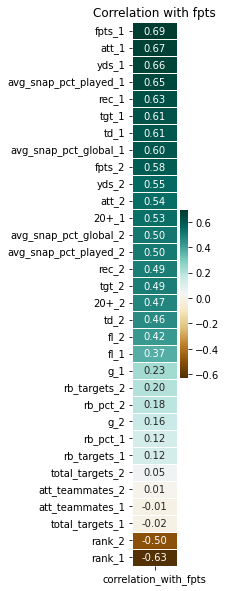

In [23]:
heatmap_corr(df_rb_21, 'fpts')

# 4. Feature selection RB

## 4.1 Remove rookies

Given that rrokies are player who are in their first ever season, there is no previous data to compare them against so initially will be dropped from the sample

In [88]:
def remove_rookies(df): 
    df = df[df['rank_1'].isnull()]
    return df

# Appendix analysis for 2023 season

## Running Backs

In [214]:
# Exclude player without carries from scoring system
df_scores_rb_22 = df_rb_22[df_rb_22['att'] > 40]

df_rb_22 = df_rb_22[df_rb_22['att'] > 30]

# Create new df to add scores
df_scores_rb_22 = df_scores_rb_22[['player', 'team']]

df_scores_rb_22.head()

,player,team
0,Austin Ekeler,LAC
1,Christian McCaffrey,SF
2,Josh Jacobs,LV
3,Derrick Henry,TEN
4,Saquon Barkley,NYG


## 1. Attempts  and att per game

In [215]:
# Create att per game
df_rb_22['att/g'] = df_rb_22['att'] / df_rb_22['g']

# Create score for att
df_scores_rb_22 = merge_score(df_rb_22, df_scores_rb_22, 'att')

df_scores_rb_22 = merge_score(df_rb_22, df_scores_rb_22, 'att/g')

df_scores_rb_22.head()

,player,team,score_att,score_att/g
0,Austin Ekeler,LAC,8.0,7.0
1,Christian McCaffrey,SF,9.5,8.5
2,Josh Jacobs,LV,10.0,10.0
3,Derrick Henry,TEN,10.0,10.0
4,Saquon Barkley,NYG,10.0,10.0


## 3. Yds and Yds per att

In [216]:
# Create att per game
df_rb_22['yds/att'] = df_rb_22['yds'] / df_rb_22['att']

df_scores_rb_22 = merge_score(df_rb_22, df_scores_rb_22, 'yds')

df_scores_rb_22 = merge_score(df_rb_22, df_scores_rb_22, 'yds/att')

df_scores_rb_22.head()

,player,team,score_att,score_att/g,score_yds,score_yds/att
0,Austin Ekeler,LAC,8.0,7.0,8.5,6.0
1,Christian McCaffrey,SF,9.5,8.5,9.5,7.0
2,Josh Jacobs,LV,10.0,10.0,10.0,7.5
3,Derrick Henry,TEN,10.0,10.0,10.0,5.5
4,Saquon Barkley,NYG,10.0,10.0,10.0,6.0


## 4. Avg snap pct played

In [217]:
df_scores_rb_22 = merge_score(df_rb_22, df_scores_rb_22, 'avg_snap_pct_played')

df_scores_rb_22 = merge_score(df_rb_22, df_scores_rb_22, 'avg_snap_pct_global')

df_scores_rb_22.head()

,player,team,score_att,score_att/g,score_yds,score_yds/att,score_avg_snap_pct_played,score_avg_snap_pct_global
0,Austin Ekeler,LAC,8.0,7.0,8.5,6.0,8.5,9.5
1,Christian McCaffrey,SF,9.5,8.5,9.5,7.0,10.0,10.0
2,Josh Jacobs,LV,10.0,10.0,10.0,7.5,10.0,10.0
3,Derrick Henry,TEN,10.0,10.0,10.0,5.5,9.5,9.5
4,Saquon Barkley,NYG,10.0,10.0,10.0,6.0,10.0,10.0


## 5. Rec abd tgts

In [218]:
# Create tgts per game 

df_rb_22['tgt/g'] = df_rb_22['tgt'] / df_rb_22['g']

df_rb_22['rec/tgt'] = df_rb_22['rec'] / df_rb_22['tgt']

df_scores_rb_22 = merge_score(df_rb_22, df_scores_rb_22, 'tgt')

df_scores_rb_22 = merge_score(df_rb_22, df_scores_rb_22, 'tgt/g')

df_scores_rb_22 = merge_score(df_rb_22, df_scores_rb_22, 'rec')

df_scores_rb_22 = merge_score(df_rb_22, df_scores_rb_22, 'rec/tgt')

df_scores_rb_22.head()

,player,team,score_att,score_att/g,score_yds,score_yds/att,score_avg_snap_pct_played,score_avg_snap_pct_global,score_tgt,score_tgt/g,score_rec,score_rec/tgt
0,Austin Ekeler,LAC,8.0,7.0,8.5,6.0,8.5,9.5,10.0,10.0,10.0,10
1,Christian McCaffrey,SF,9.5,8.5,9.5,7.0,10.0,10.0,10.0,10.0,10.0,10
2,Josh Jacobs,LV,10.0,10.0,10.0,7.5,10.0,10.0,9.0,8.5,9.0,10
3,Derrick Henry,TEN,10.0,10.0,10.0,5.5,9.5,9.5,7.5,6.5,7.5,10
4,Saquon Barkley,NYG,10.0,10.0,10.0,6.0,10.0,10.0,9.5,9.5,9.5,10


## 6. TD

In [219]:
# Create att per game
df_rb_22['td/g'] = df_rb_22['td'] / df_rb_22['g']

df_scores_rb_22 = merge_score(df_rb_22, df_scores_rb_22, 'td')

df_scores_rb_22 = merge_score(df_rb_22, df_scores_rb_22, 'td/g')

df_scores_rb_22.head()

,player,team,score_att,score_att/g,score_yds,score_yds/att,score_avg_snap_pct_played,score_avg_snap_pct_global,score_tgt,score_tgt/g,score_rec,score_rec/tgt,score_td,score_td/g
0,Austin Ekeler,LAC,8.0,7.0,8.5,6.0,8.5,9.5,10.0,10.0,10.0,10,10.0,10.0
1,Christian McCaffrey,SF,9.5,8.5,9.5,7.0,10.0,10.0,10.0,10.0,10.0,10,9.0,8.5
2,Josh Jacobs,LV,10.0,10.0,10.0,7.5,10.0,10.0,9.0,8.5,9.0,10,10.0,10.0
3,Derrick Henry,TEN,10.0,10.0,10.0,5.5,9.5,9.5,7.5,6.5,7.5,10,10.0,10.0
4,Saquon Barkley,NYG,10.0,10.0,10.0,6.0,10.0,10.0,9.5,9.5,9.5,10,9.5,9.5


## 7. Overall

In [229]:
cols = df_scores_rb_22.columns.drop(['player', 'team'])

df_scores_rb_22['score_overall'] = df_scores_rb_22.apply(lambda x: x[cols].mean(), axis=1)

df_scores_rb_22.sort_values(by='score_overall', ascending=False).head(32)

,player,team,score_att,score_att/g,score_yds,score_yds/att,score_avg_snap_pct_played,score_avg_snap_pct_global,score_tgt,score_tgt/g,score_rec,score_rec/tgt,score_td,score_td/g,score_overall
2,Josh Jacobs,LV,10.0,10.0,10.0,7.5,10.0,10.0,9.0,8.5,9.0,10,10.0,10.0,9.500000
4,Saquon Barkley,NYG,10.0,10.0,10.0,6.0,10.0,10.0,9.5,9.5,9.5,10,9.5,9.5,9.458333
1,Christian McCaffrey,SF,9.5,8.5,9.5,7.0,10.0,10.0,10.0,10.0,10.0,10,9.0,8.5,9.333333
0,Austin Ekeler,LAC,8.0,7.0,8.5,6.0,8.5,9.5,10.0,10.0,10.0,10,10.0,10.0,8.958333
6,Rhamondre Stevenson,NE,8.5,7.5,9.0,8.5,9.5,10.0,10.0,10.0,10.0,10,8.0,6.0,8.916667
10,Dalvin Cook,FA,9.5,9.5,9.5,5.5,10.0,10.0,8.5,8.0,8.5,10,9.0,8.5,8.875000
3,Derrick Henry,TEN,10.0,10.0,10.0,5.5,9.5,9.5,7.5,6.5,7.5,10,10.0,10.0,8.833333
5,Nick Chubb,CLE,10.0,10.0,10.0,8.5,7.5,8.5,7.0,5.5,6.5,10,10.0,10.0,8.625000
7,Tony Pollard,DAL,7.5,7.0,8.5,9.0,7.0,7.5,8.5,8.5,8.5,10,9.5,9.0,8.375000
16,Travis Etienne Jr.,JAC,9.0,8.0,9.5,9.0,8.5,9.0,8.0,7.0,8.0,10,8.0,6.0,8.333333


## RADAR

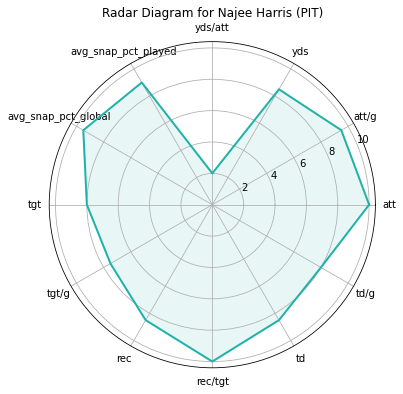

In [223]:
create_radar_diagram(df_scores_rb_22, 'Najee Harris', 'PIT')